# Import Libraries

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

# DataSet

In [19]:
df = pd.read_csv('Movie.csv', encoding='cp1252')
df.dropna(inplace = True)
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [21]:
df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [22]:
df.shape

(5659, 10)

In [23]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [24]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [25]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [28]:
df.isnull().sum().sum()

0

In [29]:
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors = 'coerce')
df['Year'].head()

1    (2019)
3    (2019)
5    (1997)
6    (2005)
8    (2012)
Name: Year, dtype: object

In [30]:
genre = df['Genre']
genre.head(11)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
15                Comedy, Drama
Name: Genre, dtype: object

In [32]:
genres = df['Genre'].str.split(', ', expand = True)
genres.head(11)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller
10,Drama,None,None
11,Horror,None,None
12,Horror,Romance,Thriller
13,Comedy,Drama,Romance


In [33]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1
           
genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [34]:
genresPie = df['Genre'].value_counts()
genresPie.head(11)

Genre
Drama                     844
Drama, Romance            332
Action, Crime, Drama      329
Action, Drama             206
Comedy, Drama             205
Comedy, Drama, Romance    188
Comedy                    187
Action                    170
Drama, Family             160
Romance                   126
Action, Comedy, Drama     118
Name: count, dtype: int64

In [35]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})

In [36]:
genrePie.head(11)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
5,"Comedy, Drama, Romance",188
6,Comedy,187
7,Action,170
8,"Drama, Family",160
9,Romance,126


In [41]:
import pandas as pd
df_movie = pd.read_csv('Movie.csv', encoding='latin1')

# Drop any rows with missing values
df_movie.dropna(inplace=True)

# Remove commas and convert the 'Votes' column to integers
df_movie['Votes'] = df_movie['Votes'].str.replace(',', '').astype(int)

# Display the first 11 rows of the 'Votes' column
df_movie['Votes'].head(11)


1        8
3       35
5      827
6     1086
8      326
9       11
10      17
11      59
12     983
13     512
15    6619
Name: Votes, dtype: int32

In [42]:
df['Director'].nunique()

2431

In [43]:
directors = df['Director'].value_counts()
directors.head(11)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Yash Chopra             22
Name: count, dtype: int64

In [44]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors.head(11)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Govinda                90
Name: count, dtype: int64

TypeError: can only concatenate str (not "int") to str

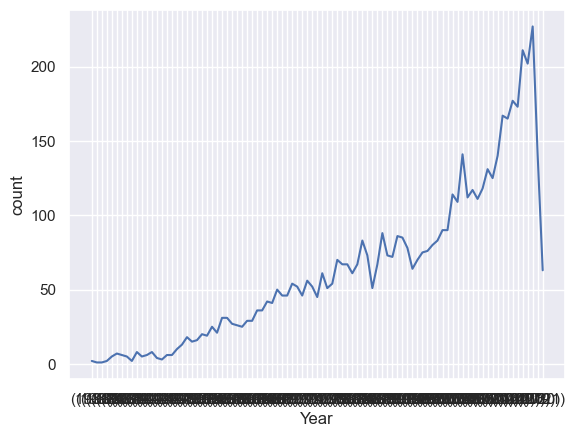

In [46]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl

# Load the CSV file into a DataFrame with a different encoding (if necessary)
df_movie = pd.read_csv('Movie.csv', encoding='latin1')

# Drop any rows with missing values
df_movie.dropna(inplace=True)

# Set the style and font for seaborn
sb.set(style='darkgrid', font='Arial')

# Create a line plot for the count of movies released per year
ax = sb.lineplot(data=df_movie['Year'].value_counts().sort_index())

# Set the positions and labels for the x-axis ticks
darkgrid_positions = range(min(df_movie['Year']), max(df_movie['Year']) + 1, 5)
ax.set_xticks(darkgrid_positions)
ax.set_xticklabels(darkgrid_positions, rotation=90)

# Set the title and labels for the axes
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xlabel("Years")
ax.set_ylabel("Count")

# Display the plot
mpl.show()


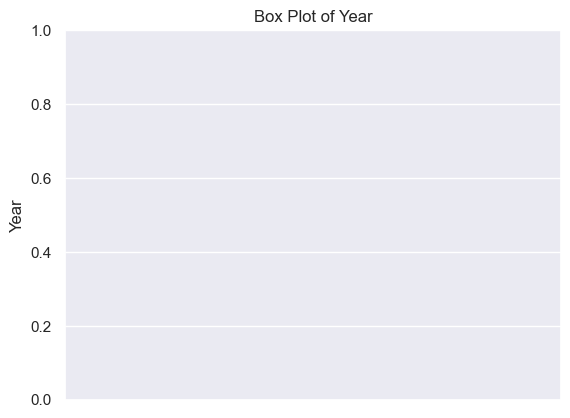

In [49]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame with a different encoding (if necessary)
df_movie = pd.read_csv('Movie.csv', encoding='latin1')

# Drop any rows with missing values
df_movie.dropna(inplace=True)

# Ensure the 'Year' column is numeric
df_movie['Year'] = pd.to_numeric(df_movie['Year'], errors='coerce')

# Drop any rows where 'Year' could not be converted to numeric
df_movie.dropna(subset=['Year'], inplace=True)

# Create a box plot for the 'Year' column
ax = sb.boxplot(data=df_movie, y='Year')

# Set the labels and title for the plot
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')

# Display the plot
plt.show()



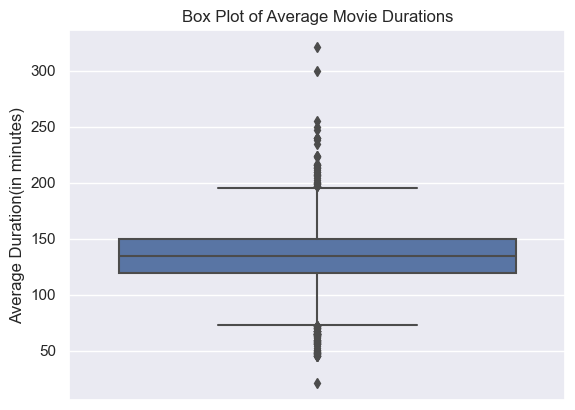

In [50]:
ax = sb.boxplot(data = df, y = 'Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

In [51]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Duration'] >= lower_bound) & (df['Duration'] <= upper_bound)]
df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


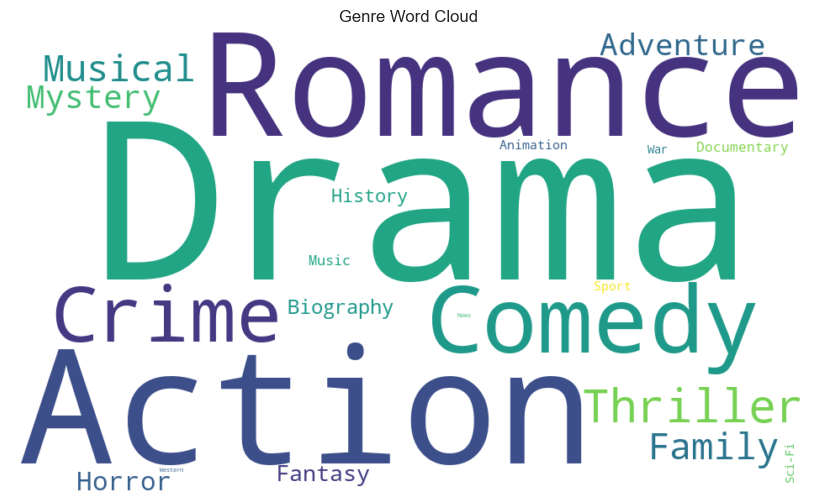

In [53]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame with a different encoding (if necessary)
df_movie = pd.read_csv('Movie.csv', encoding='latin1')

# Drop any rows with missing values
df_movie.dropna(inplace=True)

# Calculate the genre counts
genre_counts = df_movie['Genre'].str.split(', ', expand=True).stack().value_counts()

# Generate the word cloud from genre counts
wordcloud = WordCloud(width=950, height=550, background_color='white').generate_from_frequencies(genre_counts)

# Plot the word cloud
plt.figure(figsize=(16, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Genre Word Cloud')
plt.show()


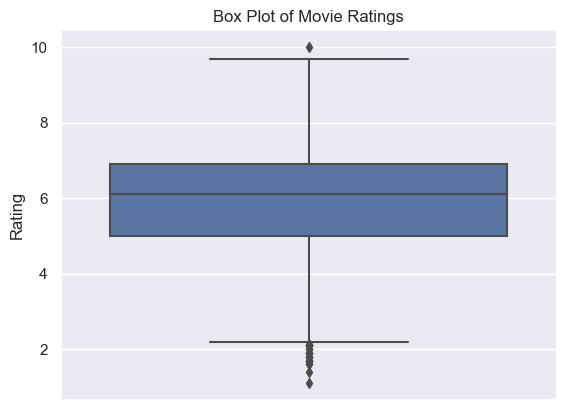

In [54]:
ax = sb.boxplot(data = df, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')
mpl.show()

In [55]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]
df.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


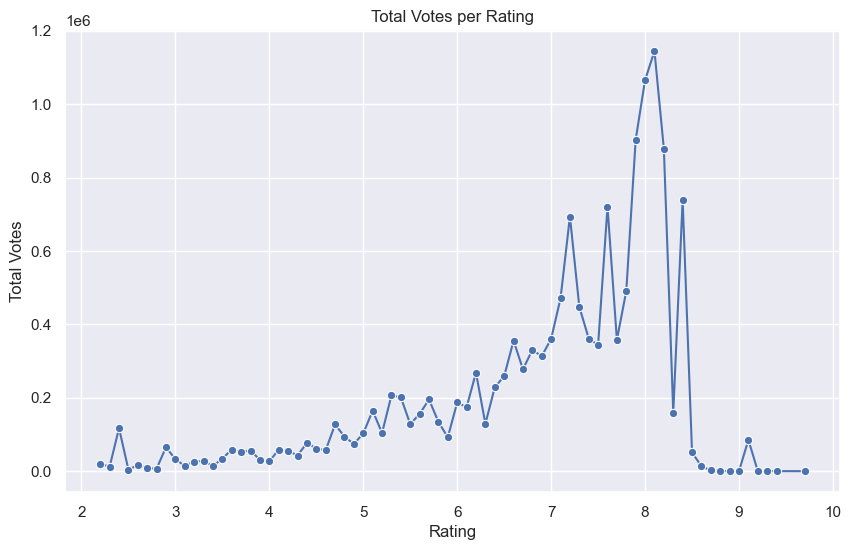

In [56]:
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()
mpl.figure(figsize=(10,6))
ax_line_seaborn = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
mpl.show()

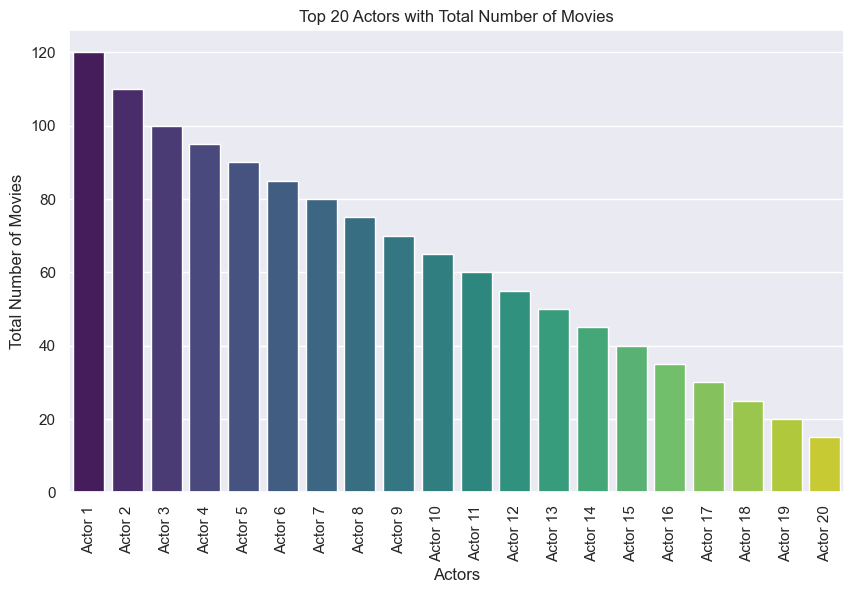

In [58]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Example data preparation
# actors = df_movie['Actors'].str.split(', ', expand=True).stack().value_counts()

# Assuming actors is already prepared as a Series with actor names as index and movie counts as values
# For demonstration purposes, here's an example actors Series
actors = pd.Series({
    'Actor 1': 120,
    'Actor 2': 110,
    'Actor 3': 100,
    'Actor 4': 95,
    'Actor 5': 90,
    'Actor 6': 85,
    'Actor 7': 80,
    'Actor 8': 75,
    'Actor 9': 70,
    'Actor 10': 65,
    'Actor 11': 60,
    'Actor 12': 55,
    'Actor 13': 50,
    'Actor 14': 45,
    'Actor 15': 40,
    'Actor 16': 35,
    'Actor 17': 30,
    'Actor 18': 25,
    'Actor 19': 20,
    'Actor 20': 15
})

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')

# Set the labels and title
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Display the plot
plt.show()


In [59]:
df['Actor'] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df['Director'] = df['Director'].astype('category').cat.codes
df['Genres'] = df['Genre'].astype('category').cat.codes
df['Actor'] = df['Actor'].astype('category').cat.codes
df.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Genres
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,610,Rasika Dugal,Vivek Ghamande,Arvind Jangid,3788,224
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,1305,Prateik,Ishita Raj,Siddhant Kapoor,3263,182
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,1493,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1091,155
6,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,1994,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,2036,283
8,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,133,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5437,314
9,@Andheri,(2014),116,"Action, Crime, Thriller",4.0,11,388,Augustine,Fathima Babu,Byon,947,37
10,1:1.6 An Ode to Lost Love,(2004),96,Drama,6.2,17,1056,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,3793,224
11,1:13:7 Ek Tera Saath,(2016),120,Horror,5.9,59,257,Pankaj Berry,Anubhav Dhir,Hritu Dudani,3151,310
12,100 Days,(1991),161,"Horror, Romance, Thriller",6.5,983,1342,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,1855,317
13,100% Love,(2012),166,"Comedy, Drama, Romance",5.7,512,1470,Jeet,Koyel Mallick,Sujoy Ghosh,1935,157


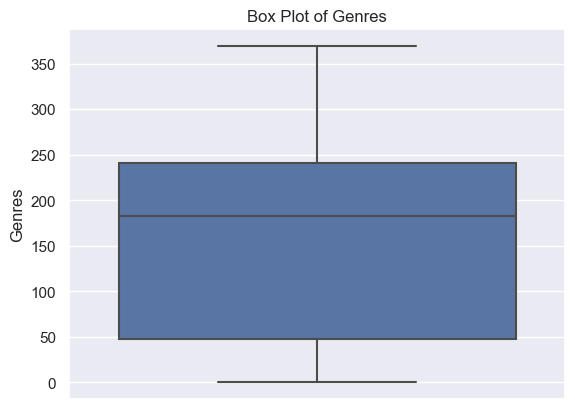

In [60]:
ax = sb.boxplot(data = df, y='Genres')
ax.set_ylabel('Genres')
ax.set_title('Box Plot of Genres')
mpl.show()

In [62]:
Q1 = df['Genres'].quantile(0.25)
Q3 = df['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Genres'] >= lower_bound) & (df['Genres'] <= upper_bound)]
df.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Genres
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,610,Rasika Dugal,Vivek Ghamande,Arvind Jangid,3788,224
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,1305,Prateik,Ishita Raj,Siddhant Kapoor,3263,182
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,1493,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1091,155
6,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,1994,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,2036,283
8,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,133,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5437,314
9,@Andheri,(2014),116,"Action, Crime, Thriller",4.0,11,388,Augustine,Fathima Babu,Byon,947,37
10,1:1.6 An Ode to Lost Love,(2004),96,Drama,6.2,17,1056,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,3793,224
11,1:13:7 Ek Tera Saath,(2016),120,Horror,5.9,59,257,Pankaj Berry,Anubhav Dhir,Hritu Dudani,3151,310
12,100 Days,(1991),161,"Horror, Romance, Thriller",6.5,983,1342,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,1855,317
13,100% Love,(2012),166,"Comedy, Drama, Romance",5.7,512,1470,Jeet,Koyel Mallick,Sujoy Ghosh,1935,157


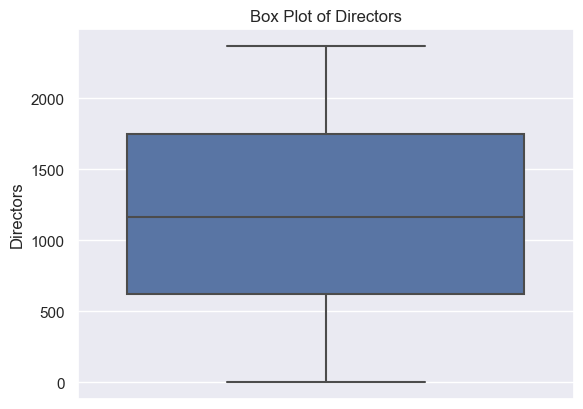

In [64]:
ax = sb.boxplot(data = df, y='Director')
ax.set_ylabel('Directors')
ax.set_title('Box Plot of Directors')
mpl.show()

In [65]:
Q1 = df['Director'].quantile(0.25)
Q3 = df['Director'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Director'] >= lower_bound) & (df['Director'] <= upper_bound)]
df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Genres
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,610,Rasika Dugal,Vivek Ghamande,Arvind Jangid,3788,224
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,1305,Prateik,Ishita Raj,Siddhant Kapoor,3263,182
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,1493,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1091,155
6,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,1994,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,2036,283
8,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,133,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5437,314
9,@Andheri,(2014),116,"Action, Crime, Thriller",4.0,11,388,Augustine,Fathima Babu,Byon,947,37
10,1:1.6 An Ode to Lost Love,(2004),96,Drama,6.2,17,1056,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,3793,224
11,1:13:7 Ek Tera Saath,(2016),120,Horror,5.9,59,257,Pankaj Berry,Anubhav Dhir,Hritu Dudani,3151,310
12,100 Days,(1991),161,"Horror, Romance, Thriller",6.5,983,1342,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,1855,317
13,100% Love,(2012),166,"Comedy, Drama, Romance",5.7,512,1470,Jeet,Koyel Mallick,Sujoy Ghosh,1935,157


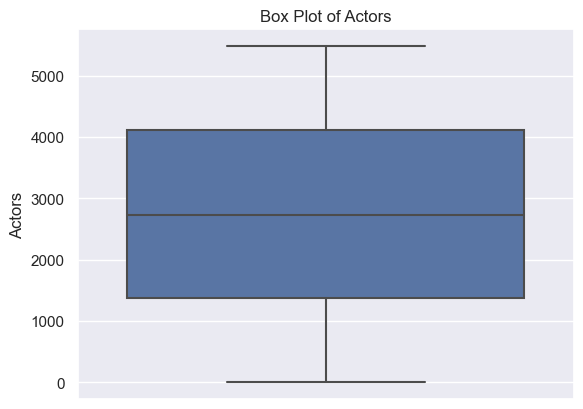

In [67]:
ax = sb.boxplot(data = df, y='Actor')
ax.set_ylabel('Actors')
ax.set_title('Box Plot of Actors')
mpl.show()

In [69]:
Q1 = df['Actor'].quantile(0.25)
Q3 = df['Actor'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Actor'] >= lower_bound) & (df['Actor'] <= upper_bound)]
df.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Genres
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,610,Rasika Dugal,Vivek Ghamande,Arvind Jangid,3788,224
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,1305,Prateik,Ishita Raj,Siddhant Kapoor,3263,182
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,1493,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1091,155
6,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,1994,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,2036,283
8,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,133,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5437,314
9,@Andheri,(2014),116,"Action, Crime, Thriller",4.0,11,388,Augustine,Fathima Babu,Byon,947,37
10,1:1.6 An Ode to Lost Love,(2004),96,Drama,6.2,17,1056,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,3793,224
11,1:13:7 Ek Tera Saath,(2016),120,Horror,5.9,59,257,Pankaj Berry,Anubhav Dhir,Hritu Dudani,3151,310
12,100 Days,(1991),161,"Horror, Romance, Thriller",6.5,983,1342,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,1855,317
13,100% Love,(2012),166,"Comedy, Drama, Romance",5.7,512,1470,Jeet,Koyel Mallick,Sujoy Ghosh,1935,157


In [71]:
Input = df.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis = 1)
Output = df['Actor']
Input.head(16)

,Year,Duration,Votes,Genres
1,(2019),109,8,224
3,(2019),110,35,182
5,(1997),147,827,155
6,(2005),142,1086,283
8,(2012),82,326,314
9,(2014),116,11,37
10,(2004),96,17,224
11,(2016),120,59,310
12,(1991),161,983,317
13,(2012),166,512,157


In [72]:
Output.head(16)

1     3788
3     3263
5     1091
6     2036
8     5437
9      947
10    3793
11    3151
12    1855
13    1935
15     499
18    3052
21    1685
22    2715
25    2587
28    2419
Name: Actor, dtype: int16